# Use Streams Designer to classify news categories using an LDA model
Part 2 of 2
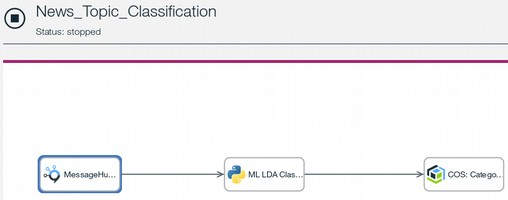
## Introduction

With the massive amounts of social media flowing over the web, imagine that you wanted to identify the subject of texts by using unsupervised machine learning in real time.

This is Part 2 of this tutorial notebook series.  
<font color=red>**UPDATE LINK!!!**</font>  
See [Part 1](https://dataplatform.ibm.com/analytics/notebooks/v2/24ca198f-bf20-4d51-b027-38017c2b94dc/view?access_token=e06a09d39b959bac9dc22782a25ba173681e8d175168bfbfc7f88065ca673a55) to see how we training an LDA machine learning model and saved it in __IBM Cloud Object Storage__.

In this tutorial notebook:
* You will deploy a Machine Learning model to perform real time analytics on streaming news documents.
* You will learn how to import a sample __streams flow__ into __IBM Cloud Streams Designer__. The _flow_ will use the LDA model to perform real-time topic classification on news documents arriving from __IBM Message Hub__, then find the document's subject category and then store the results on __Cloud Object Storage__.  
* After the _streams flow_ is up and running, we will continue in this notebook to stream the news documents to __IBM Cloud Message Hub__ so that they can be picked up by the flow.

Some familiarity with Python is recommended. This notebook has been verified for Python 3.5 and Spark 2.1.

## <a id="TOC"></a> Table of contents
1. [Use IBM Streams Designer](#flow)<br>
    1.1. [Setup](#flow1)<br>
    1.1.A. [Required IBM Cloud Services](#flow1A)<br>
    1.1.B. [[Optional] Copy a sample LDA model package to Cloud Object Storage (COS)](#flow1B)<br>
    1.1.C. [Download the sample topic classification _streams flow_](#flow1C)<br>
<br>
    1.2. [Create a _streams flow_ using _Streams Designer_](#flow2)<br>
<br>
    1.3. [Modify the flow to use your service credentials and details](#flow3)<br>
<br>
2. [Stream the news texts to Message Hub](#send)<br>
   2.1. [Setup](#send1)<br>
   2.1.A. [Install prerequisite packages](#send1A)<br>
   2.1.B. [Provide Credentials for Message Hub (MH)](#send1B)<br>
   2.1.C. [Download the sample dataset](#send1C)<br>
<br>
   2.2. [Stream the text](#send2)<br>
<br>
3. [Summary and next steps](#summary)<br>

<a id="flow"></a>
## 1. [Use IBM Streams Designer](#TOC)

<a id="flow1"></a>
### 1.1. [Setup](#TOC)

<a id="flow1A"></a>
### 1.1.A. [Required IBM Cloud Services](#TOC)
If you already have these services provisioned, just note the indicated values.

From the __IBM Cloud Dashboard__, you should provision a __Message Hub__ service.
* Create a topic to use for the flow, for example, <font color=blue>**_newsData_**</font>. This same MH topic is used in the [_streams flow_](#flow3) and in the next [section](#send1B) to send texts to the flow.

---

When you created your __Watson Studio (DSX)__ project, you were asked to associate it with a __Cloud Object Storage__ service.
* Create a bucket to store the LDA model package (you should have done this in the notebook of Part 1), for example, <font color=blue>**_pyml_**</font>.
* Create a bucket to store the output of the topic classification, for example, <font color=blue>**_pyml-output_**</font>.

If this is your first time using **Streams Designer**, you will be directed to associate it with a new or existing __Streaming Analytics__ service.

<a id="flow1C"></a>
### 1.1.B. [[Optional] Copy a sample LDA model package to Cloud Object Storage (COS)](#TOC)
<font color=red>**UPDATE LINK!!!**</font>  
If you did **NOT** create your own LDA model in [Part 1](https://dataplatform.ibm.com/analytics/notebooks/v2/24ca198f-bf20-4d51-b027-38017c2b94dc/view?access_token=e06a09d39b959bac9dc22782a25ba173681e8d175168bfbfc7f88065ca673a55) of this tutorial series, you can download this sample model package __[news.lda_model.pkg.gz](https://raw.githubusercontent.com/raanonr/DSX/master/pyML/news.lda_model.pkg.gz)__ and then load it to a bucket (e.g., <font color=blue>**_pyml_**</font>) in your __Cloud Object Storage__ service.  
The file contains the LDA model, bigram phraser, mean topic dictionary and newsgroup category dictionary.

<a id="flow1D"></a>
### 1.1.C. [Download the sample topic classification _streams flow_](#TOC)
<font color=red>**UPDATE LINK!!!**</font>  
Download this sample Streams Flow __[News_Topic_Classification.stp](https://raw.githubusercontent.com/raanonr/DSX/master/pyML/News_Topic_Classification.stp)__ to local storage. It will be used in the next step.

<a id="flow2"></a>
## 1.2. [Create a Streams Flow using Streams Designer](#TOC)
Load the sample _streams flow_ into your project.
<font color=red>**UPDATE LINK!!!**</font>  
* Go to your project.  
* Click the `Assets` tab.
* From the menu bar at the top of this page, click &oplus;__Add to project__, then select *Streams flows*.  
* Click the `From file` tab.  
* In the bottom portion of the page, browse to (or drop) the __[News_Topic_Classification.stp](https://raw.githubusercontent.com/raanonr/DSX/master/pyML/News_Topic_Classification.stp)__ _streams flow_ that you previously downloaded.  
* Make sure that your __Streaming Analytics service__ is selected.
* Click __Create__.   

The following streams flow opens:
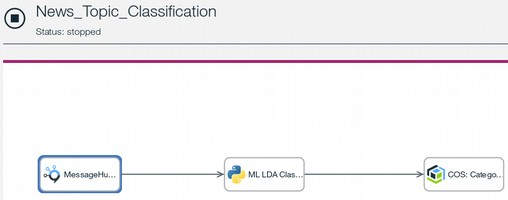

Notice the Notifications (bell) icon on the right. That icon indicates that your streams flow has errors. You need to edit the flow to use your credentials and other service details.  


Click the **_Edit the streams flow_** (pencil) icon on the top right.

<a id="flow3"></a>
## 1.3. [Modify the flow to use your service credentials and details](#TOC)

You will need to modify the flow to use your service credentials and details.  
Click the Notifications icon on the top right, then click each error to resolve it.
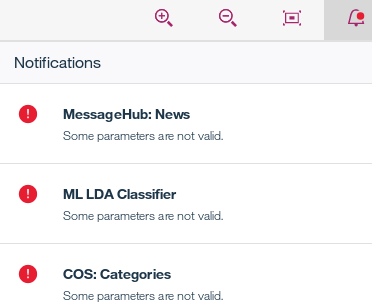

If you need to create new _connections_ to your services, click &oplus;__Add Connection__.

* Message Hub operator: Select your Message Hub service (or create a new connection to one) and then choose the same topic that you created in [Required IBM Cloud Services](#flow1A), (<font color=blue>**_newsData_**</font>, in out example).

* Python Machine Learning operator: Point the File Reference Name **model** to your LDA model file:
    - Select your COS service (or create a new connection to one)
    - In the **File path** field, click the **Select data asset** icon on the right to select the LDA model package. In our example it's <font color=blue>__*pyml/LDA_news.model.pkg.gz*__</font>.
<table><tr><td>
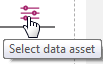
    </td><td><td><font size=150%>&#8680;</font></td><td>
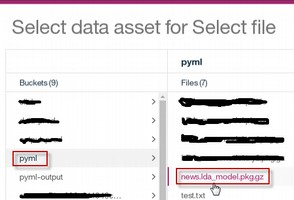
</td></tr></table>
    - You can scroll down to take a look at the Python code.
        * When initialized, it will load the NLTK lemmatizer and Part-of-Speech tagger.
        * When a **model_package** file is detected, *load_model_package()* will be called automatically, to uncompressed and deserialize the file, then load the _state_ dictionary variable with its contents.
        * Upon the arrival of each news text document (event/tuple) from Message Hub, it performs the following tasks:
          - Preprocess and cleanse the text, then tokenize, lemmatize and apply the model's Bigram Phraser.
          - Use the LDA model to apply the _Bag-of-Words_ method, which assigns word frequencies to each token in the text.
          - Use the LDA model and BOWs (frequencies) to determine the probability for each topic being a good match. The results are saved in a list (a _probability vector_ for each topic).
          - Using the euclidean distance similarity method, find the closest match between the document's topic probability vector and the probability vector for each newsgroup.
          - Return the original document text to the output flow, together with the predicted newsgroup subject category.

* Cloud Object Storage operator: 
    - Select your COS service
    - In the **File path** field, enter the file pattern to use for the output files. Use the **Select data asset** button to choose an existing bucket for the output (ie, <font color=blue>**_pyml-output_**</font>). Note that this will erase the sample file name provided. You can simply paste it after the bucket name: <font color=blue>__*news_categories.%TIME.csv*__</font>.   
      This file pattern means that whenever a new file is written in the bucket, it will be appended with the current date-time.
    - Take note of the **FILE CREATION** section, which will write a file every 30 seconds. (Feel free to change.)

When all "errors" have been resolved, click **_Save_** to save your flow, and then click **_Run_**.

You may get a message that your Streaming Analytics service needs to be restarted. If so, click **_Yes_**.
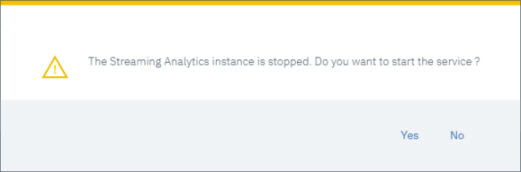

<a id="send"></a>
## 2. [Stream the news texts to Message Hub](#TOC) 
<br>   
<font color=red>Wait for your _Streams Flow_ to be in the _**running**_ state before proceeding...</font>

<a id="send1"></a>
### 2.1. [Setup](#TOC)

<a id="send1A"></a>
### 2.1.A. [Install prerequisite packages](#TOC)
Make sure that these packages are installed. (This only needs to be run once.)

In [ ]:
!pip install --user --upgrade kafka-python

If you ran the `pip install` commands above <font color=red>**RESTART**</font> the notebook kernel. From the notebook menu above, click _Kernel -> Restart and Clear Output_.

<a id="send1B"></a>
### 2.1.B. [Provide Credentials for Message Hub (MH)](#TOC)
Return to the [IBM Cloud Dashboard](https://console.bluemix.net/dashboard/) to retrieve information about your __Message Hub__ service.
* Select the `Service credentials` pane on left. Click `View credentials` on one of your credentials, and then copy it.
  * Replace the entire content of the **mh_credentials** variable below with your credentials.  
  * Make sure that the <font color=red>_name_</font> of the credentials variable is set to **mh_credentials**.

In [1]:
mh_credentials = {
    #<REPLACE>
}

Set the **mh_topic** variable to the same value that you used in the [_streams flow_](#flow3) (for example, <font color=blue>**_newsData_**</font>).

In [2]:
mh_topic = 'newsData'

<a id="send1C"></a>
### 2.1.C. [Download the sample dataset](#TOC)
We will use a newsgroup dataset <a href="https://rare-technologies.com/new-api-for-pretrained-nlp-models-and-datasets-in-gensim/" target="_blank" rel="noopener noreferrer">provided by gensim</a> for the purposes of training and testing. RaRe Technologies <a href="https://github.com/RaRe-Technologies/gensim-data#available-data" target="_blank" rel="noopener noreferrer">describes</a> the __20-newsgroup__ dataset as: _The notorious collection of approximately 20,000 newsgroup posts, partitioned (nearly) evenly across 20 different newsgroups._ This code is based on the source code found at <a href="https://github.com/RaRe-Technologies/gensim/blob/master/gensim/downloader.py" target="_blank" rel="noopener noreferrer">https://github.com/RaRe-Technologies/gensim/blob/master/gensim/downloader.py</a>.

In [3]:
DOWNLOAD_BASE_URL = "https://github.com/RaRe-Technologies/gensim-data/releases/download"
dataset="20-newsgroups"

#!rm -f {dataset}.gz*
![[ ! -f {dataset}.gz ]] && wget '{DOWNLOAD_BASE_URL}/{dataset}/{dataset}.gz'
!pwd && ls -l {dataset}.gz*

/gpfs/fs01/user/sca9-7277eb31bca08b-bc196c953de3/notebook/work
-rw------- 1 sca9-7277eb31bca08b-bc196c953de3 users 14483581 Nov  9 17:44 20-newsgroups.gz


<a id="send2"></a>
## 2.2. [Stream the text](#TOC)

### [function: read_dataset_texts](#TOC)
This function reads the input dataset file. The input is in JSON format, with a property called `data` for the submitted text documents.

Parameters:
* dataset_path: Path and filename of the dataset file.
* max_lines: If greater than 0, read only max_lines number of lines.

Returns:
* texts: List of the text documents.

In [4]:
def read_dataset_texts(dataset_path, max_lines=0):
    from smart_open import smart_open
    import json

    print("opening...", dataset_path)
    
    texts = []
    with smart_open( dataset_path, 'rb') as infile:
        for i, line in enumerate(infile):
            if max_lines > 0 and i == max_lines: break
            jsonData = json.loads(line.decode('utf8'))
            texts.append(jsonData['data'])

    print(len(texts), "lines read")

    return texts

### [function: create_messagehub_producer](#TOC)
Return a KafkaProducer for the Message Hub service.

Parameters:
* cred: Dictionary of MH credentials.
* value_serializer: serializer for writing the MH message. The default is to format it as a JSON object.

Returns:
* producer: KafkaProducer for the Message Hub service.

In [5]:
import json

def create_messagehub_producer(cred, value_serializer=lambda v: json.dumps(v).encode('utf-8')):
    import ssl
    from kafka import KafkaProducer
    from kafka.errors import KafkaError

    # Check for required credentials (without defaults).
    username = cred.get('username', cred.get('user'))
    password = cred.get('password')
    # Variables from credentials, but with defaults
    security_protocol = cred.get('security_protocol', 'SASL_SSL')
    sasl_mechanism = cred.get('sasl_mechanism', 'PLAIN')
    kafka_brokers_sasl = cred.get('kafka_brokers_sasl', [
        "kafka01-prod02.messagehub.services.us-south.bluemix.net:9093",
        "kafka02-prod02.messagehub.services.us-south.bluemix.net:9093",
        "kafka03-prod02.messagehub.services.us-south.bluemix.net:9093",
        "kafka04-prod02.messagehub.services.us-south.bluemix.net:9093",
        "kafka05-prod02.messagehub.services.us-south.bluemix.net:9093"
    ])

    if not username or not password:
        print("ERROR: Missing username or password")
        return

    # Create a new context using system defaults, disable all but TLS1.2
    context = ssl.create_default_context()
    context.options &= ssl.OP_NO_TLSv1
    context.options &= ssl.OP_NO_TLSv1_1

    producer = KafkaProducer(bootstrap_servers = kafka_brokers_sasl,
                             sasl_plain_username = username,
                             sasl_plain_password = password,
                             security_protocol = security_protocol,
                             ssl_context = context,
                             sasl_mechanism = sasl_mechanism,
                             client_id = mh_topic,
                             value_serializer=value_serializer)

    return producer

### [Stream the text](#TOC)

#### Read the dataset file

In [6]:
data = read_dataset_texts(dataset + ".gz")

opening... 20-newsgroups.gz
18846 lines read


#### Create the Message Hub producer

In [7]:
mh_producer = create_messagehub_producer( mh_credentials)

#### Send all of the text data to the MH topic
This sends all news texts to the MH topic, pausing for 1 second every 1000 entries (to slow things down). You can repeat this cell as many times as you like.

In [8]:
import time

print(mh_topic)
for i, entry in enumerate(data):
    rc = mh_producer.send( mh_topic, { 'text': entry } )
    if ((i+1) % 1000) == 0:
        print(i+1, end=" ")
        time.sleep(1) # Slow things down during demo

newsData
1000 2000 3000 4000 5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 

### [View the results](#TOC)
If you switch to your streams flow, you should now see the texts arriving from Message Hub into your flow.
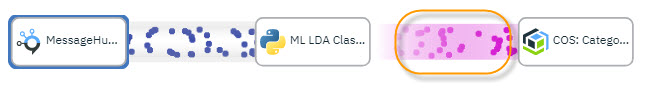
Click on the area where the balls are flowing between the Python Machine Learning operator, which we called _ML LDA Classifier_, and the COS operator. This will open a panel to the right, which displays the content of the data which is flowing. Here we see that a news topic category has been predicted by our Machine Learning LDA model and attached to each document text.
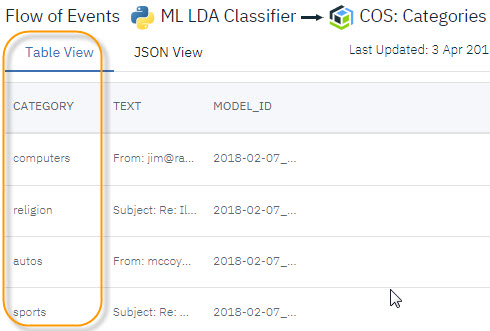

<a id="summary"></a>
## 6. [Summary and next steps](#TOC)

You have now deployed a Machine Learning model to perform real time analytics on streaming news documents.

### <a id="authors"></a>Authors
**Raanon Reutlinger** is a Developer at IBM Cloud Developer Services, working on the __Streams Designer__ IBM Cloud service. Raanon has over 20 years of experience in the IBM Software Group, working in Data Management, Big Data, and Watson teams.
<hr>
Copyright &copy; IBM Corp. 2017,2018. This notebook and its source code are released under the terms of the MIT License.